# Exercise 4.9 Data Visualisation
## This notebook contains the following steps
## 1. Import libraries
## 2. Checking imported Dataframe
## 3. Creating a histagram using matplotlib
## 4. Creating a barchart using matplotlib
## 5. Creating Sampling Data from the DF
## 6. Creating a line chart using matplotlib from sampled data
## 7. Create a scatterplot using seaborn
## 8. Exporting visualisations as .pgn

In [1]:
# Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create directory path
path = r'C:\Users\luke_\Desktop\CF Datacourse\Python_exercise4\09-2024 Instacart Basket Analysis\02_data'

In [4]:
# Import project data
instacart_data = pd.read_pickle(os.path.join(path, 'prepared_data', 'ords_prods_custos_merged.pkl'))

In [5]:
#checking imported dataframe
instacart_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,time_of_order,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “time_of_order” column. 

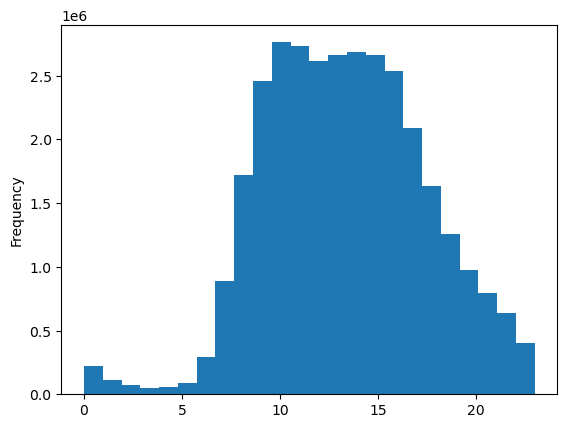

In [6]:
hist = instacart_data['time_of_order'].plot.hist(bins = 24)

## The histogram shows peaks which indicate the times of day when the most orders are placed (Between 10h00 and 15h00). This suggests that customers do their shopping during lunch hours or perhaps when children are at school or kindergarten. There is a steeper ramp up of orders in the morning () from 7h00 to 10h00) and a slower trickel in the evening (From 16h00 to 22h00).

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

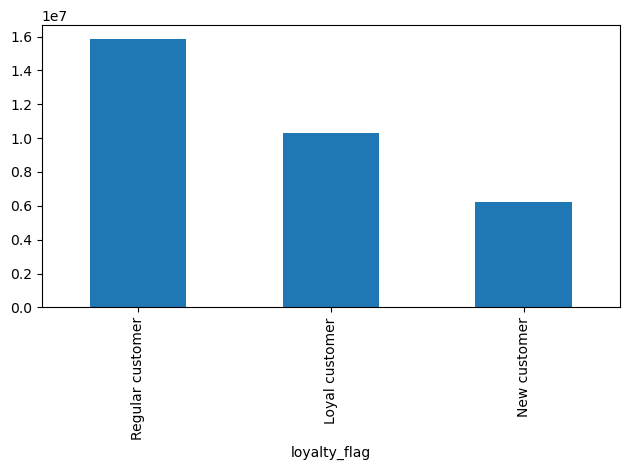

In [7]:
bar = instacart_data['loyalty_flag'].value_counts().plot.bar()
plt.tight_layout()

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
## To do this we will create samples of the whole data, which we will split into two groups. one with 30% of the whole, and another with 70%.

In [8]:
# Create random sample by generating a seed
np.random.seed(4)

In [9]:
# Create dev list based on the data split
dev = np.random.rand(len(instacart_data)) <= 0.7

In [10]:
# Split the dataframe into two samples
big = instacart_data[dev]
small = instacart_data[~dev]

In [11]:
# Compare the original df length to the sum of the big and small samples
len(instacart_data)

32404859

In [12]:
len(big) + len(small)

32404859

In [13]:
# Select only the columns needed for the analysis
instacart_small = small [['time_of_order','prices']]

In [14]:
# Check the subset
instacart_small.head()

,time_of_order,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


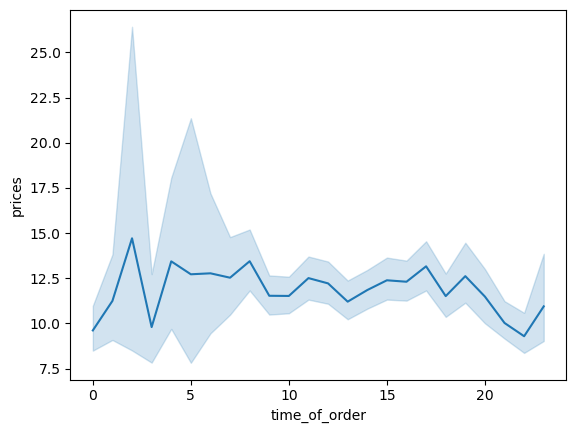

In [15]:
# Create line chart
line = sns.lineplot(data = instacart_small, x = 'time_of_order',y = 'prices')

## The most expensive products are bought between midnight and 5h00, in the morning. The lest expensive products are bought around 22h00.

# 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [16]:
# Select only the columns needed for the analysis
instacart_small_2 = small [['age','n_dependants']]

In [17]:
# Check the subset
instacart_small_2.head()

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


KeyboardInterrupt: 

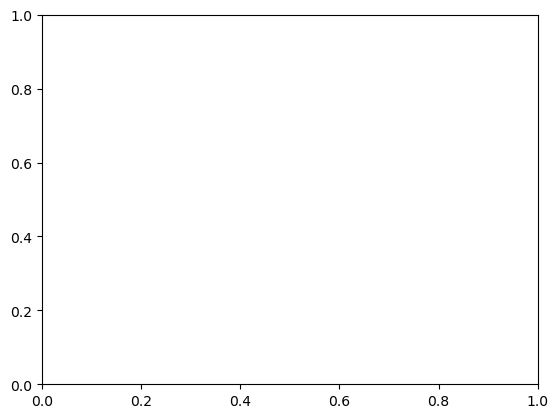

In [18]:
# Create a line chart
line_2 = sns.lineplot(data = instacart_small_2, x = 'age',y = 'n_dependants')

## There does not seem to be any clear corralation between age and the number of dependants. For a clearer idea, a scatter plot would be a better tool.

# 7. Explore whether there’s a connection between age and spending power (income) using a scatterplot

In [ ]:
# Select only the columns needed for the analysis
instacart_small_3 = small [['age','income']]

In [ ]:
# Create a scatterplotplt.
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_small_3)
plt.tight_layout()

## There is a broad range of incomes among younger age groups, particularly between ages 20 and 40, with a noticeable concentration at the lower end of the income spectrum. From around age 40 onward, there seems to be an upward trend in income, with more data points clustered in the higher income brackets. This pattern may suggest that income tends to increase with age. The highest concentration of points for individuals over 40 appears significantly higher on the income scale compared to those under 40, indicating a possible rise in median income with age. While the scatterplot visually suggests trends, such as potential income growth with age, further statistical analysis would be needed to confirm any correlations and to better understand the relationship between age and income among the customers.

In [ ]:
crosstab_region = pd.crosstab(instacart_data['price'], instacart_data['loyalty_flag'], dropna = False)

# 8. Export your visualizations as “.png” files in your relevant project folder

In [ ]:
# Create new directory path
path2 = r'C:\Users\luke_\Desktop\CF Datacourse\Python_exercise4\09-2024 Instacart Basket Analysis\04_analysis'

In [ ]:
hist.figure.savefig(os.path.join(path2,'visualisations', 'hist_order_frequency.png'))

In [ ]:
bar.figure.savefig(os.path.join(path2,'visualisations', 'customer_loyalty_distribution.png'))

In [ ]:
line.figure.savefig(os.path.join(path2, 'visualisations', 'price_by_hour.png'))

In [ ]:
line_2.figure.savefig(os.path.join(path2,'visualisations', 'age_and_n_dependants.png'))

In [ ]:
scatterplot.figure.savefig(os.path.join(path2, 'visualisations', 'income_by_age.png'))